# Exploring ergodicity

Exploration of the topic of ergodicity was spurred while reading Nassim Nicholas Taleb's book *Fooled by Randomness*.

In the book, Taleb gives the following rough (by his own description) explanation of ergodicity: *..."(under certain conditions) very long sample paths would end up resembling each other.  The properties of a very, very long sample path would be similar to the Monte Carlo properties of an average of shorter ones."*

Ole Peters, in his 2019 article 'The ergodicity problem in economics' (*Nature Physics* 15:1216-1221), describes an ergodic system as one in which the time average equals its expectation value (i.e. it satisfies Birkhoff's equation). 



## Part I. A basic function to model basic time series data (bets placed over time)

We create a function that accepts a starting bet, a list of 0/1 outcomes, a percentage gained for a win, and a percentage lost for a loss.  
It outputs the trajectory of amount made/lost after each bet (where the # of bets is the length of your list of 0/1 outcomes).

For example, we can make a list of 0/1 outcomes that models a series of 1,000 Bernoulli random variables with probabiliy = 0.5.  
Then, betting_trajectory(1, outcomes, 0.5, 04) models this system:
* Starting with \$1, we place 1,000 bets where the probability of winning (or losing) is 1/2.
* For a winning bet (outcome = 1) we add 5% to our total
* For a losing bet (outcome = 0), we subtract 3% from our total

This system is different from placing the 1,000 bets simultaneously.  In that case, each betting trial is independent and the expected value of our final amount is \$1,050. But in our case, the value of each bet depends on the previous one.

In [1]:
def betting_trajectory(bet, outcomes, gain, loss):
    """ Takes a starting bet and a listof 0/1 (lose/win) outcomes, and outputs
        the trajectory of outcomes where 1 (win) = 5% gain, 0 (lose) = 3% loss
    
    Params:
    ----
    bet: String
        Your starting bet amount (e.g. 1, to bet $1)
    outcomes: List
        A list of 0/1 outcomes, length = # bets to run
    
    Returns: 
    ----
    bet_trajectory: List
        List of the outcomes of each bet, length = # bets run
    
    """
    import numpy as np
    
    bet_trajectory = []
    
    for n in outcomes:
        if n == 1:
            bet += bet * gain
        else:
            bet += bet * -loss
        bet_trajectory.append(bet)
        
    return(bet_trajectory)

We generate a list of 1,000 bets where the probability of winning is 1/2.

In [6]:
import numpy as np 

n, p = 1, 0.5
num_trials = 1000

outcomes = np.random.binomial(n, p, num_trials)

print("The number of bets we will make is {}".format(len(outcomes)))
print("The total number of wins is {}".format(sum(outcomes)))

The number of bets we will make is 1000
The total number of wins is 486


Then we create our betting trajectory assuming a 50% gain when we win, and a 40% loss when we lose. We start by betting 1.

In [7]:
bet_trajectory = betting_trajectory(1, outcomes, 0.5, 0.4)

print("Number of bets made is {}".format(len(bet_trajectory)))
print("Min amount is {0} and max amount is {1}".format(min(bet_trajectory), max(bet_trajectory)))


Number of bets made is 1000
Min amount is 1.5772919257405235e-29 and max amount is 3.375


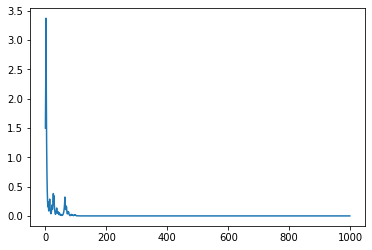

In [9]:
import matplotlib.pyplot as plt

plt.plot(bet_trajectory)
plt.show()

## Part II. Obsering many possible sample paths

One common roadblock in human cognition is that since we can only observe the path that actually happens, we have difficulty considering all possible paths when we are assessing risk.

We can create a loop to observe many possible paths of a series of bets like that we have just observed.  
We can tweak parameters like how many bets per series, and the percent gained or loss, and observe any number of possible sample paths plotted (on the log scale).

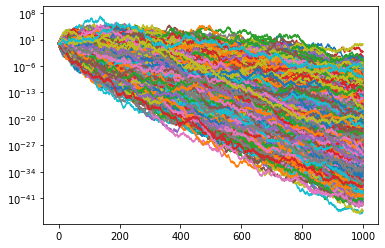

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure

last_bets = []
for n in range(5000):
    num_bets = 1000
    outcomes = np.random.binomial(1, 0.5, size=num_bets)
    bet_trial = betting_trajectory(1,outcomes, 0.5, 0.4)
    last_bets.append(bet_trial[999])
    plt.semilogy(range(num_bets), bet_trial)

plt.show()

## Part III. Observing the distribution of final values for many sample paths

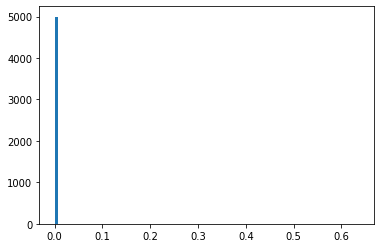

0.0001287781862994883


In [13]:
import matplotlib.pyplot as plt

plt.hist(last_bets, 100) # num bins
plt.show()

print(np.mean(last_bets))